## Exploratory Notebook (EDA)

In [82]:
#Import necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

In [33]:
#Import data from compiled .csv file 

fish_stock_data = pd.read_csv('Stocking_All_Years.csv')
fish_stock_data.rename(columns={'Spieces':'Species', 'Quanty':'Quantity'}, inplace=True) #Renaming misspelled column names 
fish_stock_data

,Water Name,County,Species,Quantity,Average Length,Date Stocked
0,ABERDUNK L FL,SEVIER,TIGER TROUT,103,2.68,06/24/2024
1,ABES RES,SEVIER,CUTTHROAT,100,1.93,09/12/2024
2,ACADEMY MILL RES,SANPETE,TIGER TROUT,3006,2.68,06/25/2024
3,ADAMS RESERVOIR,DAVIS,RAINBOW,1102,9.68,03/05/2024
4,ADAMS RESERVOIR,DAVIS,RAINBOW,1395,9.52,03/12/2024
...,...,...,...,...,...,...
54973,YELLOW LAKE NCL,GARFIELD,BROOK TROUT,252,2.88,7/8/2002
54974,"YELLOWPINE,LOWER W66",SUMMIT,BROOK TROUT,199,2.54,6/24/2002
54975,"YELLOWPINE,UPPER W65",SUMMIT,BROOK TROUT,306,2.54,6/24/2002
54976,YELLOWSTONE R,DUCHESNE,RAINBOW,998,8.95,5/16/2002


In [34]:
#Combining data where only 'Quantity' value is different, to compile stock instances on same day

fish_stock_data = fish_stock_data.groupby(['Water Name', 'County', 'Species', 'Average Length', 'Date Stocked']).agg({"Quantity": 'sum'}).reset_index()
fish_stock_data

,Water Name,County,Species,Average Length,Date Stocked,Quantity
0,12 SECRET,SANPETE,BROOK TROUT,3.04,7/17/2002,178
1,ABERDUNK L FL,SEVIER,TIGER TROUT,2.34,7/7/2010,195
2,ABERDUNK L FL,SEVIER,TIGER TROUT,2.68,06/24/2024,103
3,ABERDUNK L FL,SEVIER,TIGER TROUT,2.71,6/25/2018,101
4,ABERDUNK L FL,SEVIER,TIGER TROUT,2.71,6/26/2017,100
...,...,...,...,...,...,...
46592,YUBA RES (SEVIER BRG,JUAB,WIPER,8.28,5/14/2020,2099
46593,YUBA RES (SEVIER BRG,JUAB,WIPER,8.41,5/14/2020,1596
46594,YUBA RES (SEVIER BRG,JUAB,WIPER,8.42,7/17/2023,2204
46595,YUBA RES (SEVIER BRG,JUAB,WIPER,8.42,7/19/2023,3900


In [ ]:
# Iterate through values in 'Water Name' and add corresponding water body type in new column

river_values = [' R']
pond_values = [' POND', ' P ', 'PARK', 'WPA', ' PND', ' PONDS', ' PD', ' Pond']
creek_values = [' CR', ' CREEK']
res_values = ['RES', 'Res', 'RESERVOIR', 'Reservoir']
lake_values = [' L', ' LAKES', ' LAKE', ' Lake']
fishery_values = [' FISHERY', ' Fishery', 'BLUE RIBBON']

for i, row in fish_stock_data.iterrows():
    water_name = row['Water Name']
    if any(value in water_name for value in fishery_values):
        fish_stock_data.at[i, 'Water Body Type'] = 'Fishery'
    elif any(value in water_name for value in res_values):
        fish_stock_data.at[i, 'Water Body Type'] = 'Reservoir'
    elif any(value in water_name for value in lake_values):
        fish_stock_data.at[i, 'Water Body Type'] = 'Lake'
    elif any(value in water_name for value in pond_values):
        fish_stock_data.at[i, 'Water Body Type'] = 'Pond'
    elif any(value in water_name for value in river_values):
        fish_stock_data.at[i, 'Water Body Type'] = 'River'
    elif any(value in water_name for value in creek_values):
        fish_stock_data.at[i, 'Water Body Type'] = 'Creek'
    else:
        fish_stock_data.at[i, 'Water Body Type'] = 'Other'


,Water Name,County,Species,Average Length,Date Stocked,Quantity,Water Body Type
0,12 SECRET,SANPETE,BROOK TROUT,3.04,7/17/2002,178,Other
1,ABERDUNK L FL,SEVIER,TIGER TROUT,2.34,7/7/2010,195,Lake
2,ABERDUNK L FL,SEVIER,TIGER TROUT,2.68,06/24/2024,103,Lake
3,ABERDUNK L FL,SEVIER,TIGER TROUT,2.71,6/25/2018,101,Lake
4,ABERDUNK L FL,SEVIER,TIGER TROUT,2.71,6/26/2017,100,Lake
...,...,...,...,...,...,...,...
46592,YUBA RES (SEVIER BRG,JUAB,WIPER,8.28,5/14/2020,2099,Reservoir
46593,YUBA RES (SEVIER BRG,JUAB,WIPER,8.41,5/14/2020,1596,Reservoir
46594,YUBA RES (SEVIER BRG,JUAB,WIPER,8.42,7/17/2023,2204,Reservoir
46595,YUBA RES (SEVIER BRG,JUAB,WIPER,8.42,7/19/2023,3900,Reservoir


In [35]:
#Checking for any missing or null values 

null_values = fish_stock_data.isnull().sum()
print(null_values)

Water Name        0
County            0
Species           0
Average Length    0
Date Stocked      0
Quantity          0
dtype: int64


In [36]:
# Summary of basic data features 

fish_stock_data.describe(include='all')

,Water Name,County,Species,Average Length,Date Stocked,Quantity
count,46597,46597,46597,46597.000000,46597,4.659700e+04
unique,1257,29,33,NaN,4569,NaN
top,STRAWBERRY RES,UTAH,RAINBOW,NaN,6/25/2018,NaN
freq,1063,4684,28548,NaN,95,NaN
mean,NaN,NaN,NaN,8.346806,NaN,4.780183e+03
std,NaN,NaN,NaN,3.894497,NaN,2.548736e+04
min,NaN,NaN,NaN,0.200000,NaN,0.000000e+00
25%,NaN,NaN,NaN,4.660000,NaN,4.190000e+02
50%,NaN,NaN,NaN,9.470000,NaN,8.030000e+02
75%,NaN,NaN,NaN,10.340000,NaN,2.000000e+03


In [38]:
unique_fish_names = fish_stock_data['Species'].unique()
print(unique_fish_names)

['BROOK TROUT' 'TIGER TROUT' 'CUTTHROAT' 'BASS LARGEMOUTH' 'BROWN TROUT'
 'CHANNEL CATFISH' 'RAINBOW' 'SUNFISH BLUEGILL' 'WIPER' 'MUSKIE TIGER'
 'RAINBOW ALBINO' 'CHUB' 'GOLDEN TROUT' 'GRAYLING ARCTIC' 'CRAPPIE BLACK'
 'SPLAKE' 'LAKE TROUT' 'ALL TROUT' 'SUCKER' 'WALLEYE' 'KOKANEE'
 'GRASS CARP STERILE' 'DACE' 'SCULPIN' 'BULLHEAD BLACK' 'BASS SMALLMOUTH'
 'PERCH YELLOW' 'CRAPPIE WHITE' 'WOUNDFIN MINNOW' 'MINNOW'
 'FLANNELMOUTH SUCKER' 'SUCKER GREEN' 'WHITEFISH']


In [39]:
unique_water_names = fish_stock_data['Water Name'].unique()
print(unique_water_names)

['12 SECRET' 'ABERDUNK L FL' 'ABES L W-30' ... 'YELLOWSTONE R'
 'YOUNG L X-100' 'YUBA RES (SEVIER BRG']


In [47]:
#List of top 5 fish species that are stocked the most

top_5_fish_species = fish_stock_data.groupby('Species')['Quantity'].sum().nlargest(5).reset_index(name='Total Quantity')
top_5_fish_species

,Species,Total Quantity
0,RAINBOW,88031398
1,CUTTHROAT,44812501
2,KOKANEE,24237498
3,WALLEYE,24050272
4,TIGER TROUT,10408311


In [ ]:
#Listing top 10 stocking locations by county

top_10_watername_per_county = fish_stock_data.groupby('County')['Water Name'].value_counts().groupby(level=0).head(10).reset_index(name='Count')
top_10_watername_per_county

,County,Water Name,Count
0,BEAVER,BEAVER R,169
1,BEAVER,LITTLE RES,144
2,BEAVER,"KENTS L, MIDDLE",137
3,BEAVER,MINERSVILLE RES,134
4,BEAVER,LABARON RES,105
...,...,...,...
277,WEBER,WEBER R,112
278,WEBER,FT BUENAVENTURA P,82
279,WEBER,CAUSEY RES,70
280,WEBER,FOUR MILE CR,32


In [ ]:
#Maybe compare above chart to top 10 areas where most amount of fish are being stocked? and compare to see which one to use 

In [89]:
#Vis: Bar chart for number of stocked fish by species 
#Change interactivity to be by year

count_by_species = fish_stock_data.groupby('Species')['Quantity'].sum().reset_index()

base_plot = alt.Chart(count_by_species)

bar_chart = base_plot.mark_bar().encode(
    x='Species',
    y='Quantity'
).properties(
    width=600,
    height=400,
    title='Number of Stocked Fish by Species'
)

bar_chart

/Users/Daxtonfurniss_1/opt/anaconda3/envs/conda_clone/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

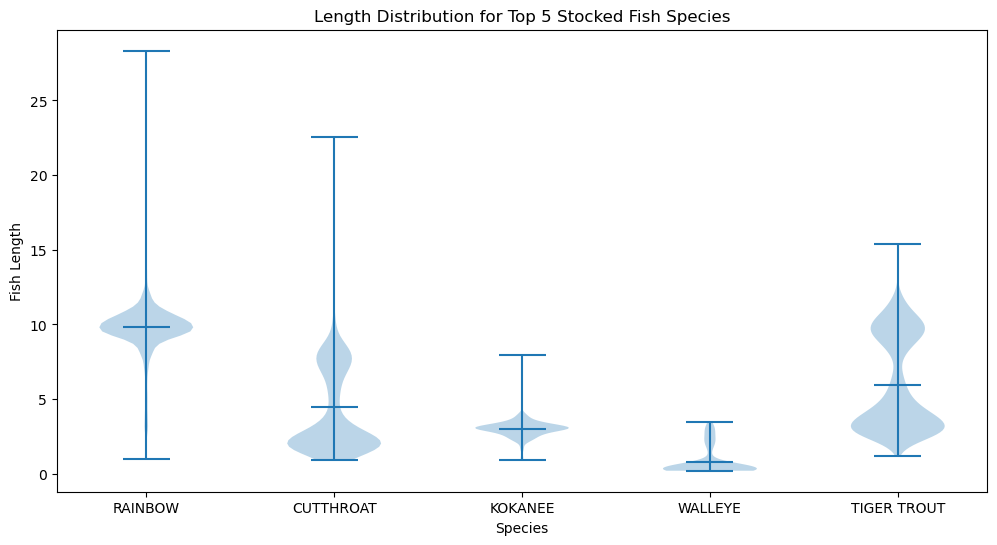

In [75]:
# Vis: Violin Plot? 

species_filter = ['RAINBOW', 'CUTTHROAT', 'KOKANEE', 'WALLEYE', 'TIGER TROUT']
filtered_data = fish_stock_data[fish_stock_data['Species'].isin(species_filter)]

plt.figure(figsize=(12, 6))
plt.violinplot([filtered_data[filtered_data['Species'] == species]['Average Length'] for species in species_filter], showmeans=True)
plt.title('Length Distribution for Top 5 Stocked Fish Species')
plt.xlabel('Species')
plt.ylabel('Fish Length')
plt.xticks(ticks=range(1, len(species_filter) + 1), labels=species_filter)
plt.show()

In [44]:
# Vis: Bar Chart Total number of fish stocked in Utah by Species 